Group 8 - Portfolio 2

The second portfolio sheet is about a real-world scenario, where you should leverage your knowledge related to proximity functions to embed and further process given data.
All exercises should be completed in order and the solution consists of python code and answers to questions.

Exercise1: ‘Data set’

Create a data set import script

• Load the protein sequence data set in the .fasta format. The numbers in the square brackets correspond to class labels.

Hint: Search for the python package ‘biopython’

In [2]:
from Bio import SeqIO
import pandas as pd

In [3]:
#Extracting the data from the .fasta file into a list 
protein_sequences = list(SeqIO.parse("protein_sequence.fasta", "fasta")) 

ids = []
sequences = []

for protein_sequence in protein_sequences:

    description = protein_sequence.description 

    #Description contains everything apart from the protein_sequence ie, Q5AV81 [16491]
    #As class labels are within [], extracting this data explicitly as the id

    label_start = description.find('[') + 1
    label_end = description.find(']')
    
    if label_start != -1 and label_end != -1:

        label = description[label_start:label_end]
        protein_sequence.id = label
        
        ids.append(protein_sequence.id)
        sequences.append(str(protein_sequence.seq))

In [4]:
df = pd.DataFrame({'Protein id': ids, 'Protein Sequence': sequences}) #converting to a dataframe for better processing

df

,Protein id,Protein Sequence
0,16491,MVRIFITGSSDGIGQAAAKVLSEQGHSVVLHARNADRAASAQEAVP...
1,16491,MTHALDTLALNQLFTEARTHNAWRDEPVAPELLRQLHELAKWGPTA...
2,90729,MKIVLVFVCTLYLAQATYLSEQDVNEVSEFLEALDQANEAASEMVE...
3,3677,MIALSVCWQIVRYLCRIRQMXGLNAIEHSNYLRNYMGHLRQKLEQD...
4,4867,NKTNLKQLKAEAARKKAXMQDMXTSVKVEPLXAXXNGAXRM
...,...,...
4995,46872,MSKVTFRADDDLVAAVEDLDASKSEVMRNALRAYLTTHAAADDVPV...
4996,5509,MDLRQFLMCLSLCTAFALSKPTEKKDRVHHEPQLSDKVHNDAQSFD...
4997,46872,MAYRDQPLGELALSIPRASALFRQYDMDYCCGGKQTLARAAARHDV...
4998,3723,MKEYQVYLERARSRQQDFLYPLIFREYIYGLAYSHNWNRSIFVENG...


In [5]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from Bio import pairwise2
import numpy as np
import pandas as pd

### Calculating Smith-Waterman alignment score
def smith_waterman_alignment_score(seq1, seq2, match_score=2, mismatch_penalty=-1, gap_open_penalty=-1, gap_extend_penalty=-1):

    # The pairwise2.align.localms() function for local sequence alignment
    alignments = pairwise2.align.localms(seq1, seq2, match_score, mismatch_penalty, gap_open_penalty, gap_extend_penalty)
    best_alignment = max(alignments, key = lambda x: x.score)

    return best_alignment.score       #Return the best alignment

/home/lilly/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [6]:
### Pair-wise similarity matrix
def get_similarity_matrix(sequences, num_sequences):

  similarity_matrix = np.zeros((num_sequences,num_sequences))
  for i in range(num_sequences):
      for j in range(i, num_sequences):
          seq1 = sequences[i]
          seq2 = sequences[j]
          alignment_score = smith_waterman_alignment_score(seq1, seq2)

          # Assume symmetry
          similarity_matrix[i][j] = similarity_matrix[j][i] = alignment_score

  return similarity_matrix

In [29]:
df_seq = df[:50]
df_seq

,Protein id,Protein Sequence
0,16491,MVRIFITGSSDGIGQAAAKVLSEQGHSVVLHARNADRAASAQEAVP...
1,16491,MTHALDTLALNQLFTEARTHNAWRDEPVAPELLRQLHELAKWGPTA...
2,90729,MKIVLVFVCTLYLAQATYLSEQDVNEVSEFLEALDQANEAASEMVE...
3,3677,MIALSVCWQIVRYLCRIRQMXGLNAIEHSNYLRNYMGHLRQKLEQD...
4,4867,NKTNLKQLKAEAARKKAXMQDMXTSVKVEPLXAXXNGAXRM
5,3723,MARGNDIERVVADNRKARHDYFIEETYEAGIALTGSEIKSIRAGQV...
6,90729,LVVSVTSRRVRFWDDFERDENFEEERPYLRNVKRACNDYKSSSYCR...
7,3735,MPKLKTRKAAAKRYKRTGTSNFLRRHAFKGHLLMKKSNKQKRKLSQ...
8,3746,MTTITPIMVKELRERTGAAVMACKKALQETNGDMEAAIDLLRKAGD...
9,3746,MVLAKDLKSGMTFLNGEKLLRVMEASHHKPGKGNTIMRMKLKDVRS...


In [30]:
top50_seq = list(df_seq['Protein Sequence'])
num_sequences = len(top50_seq)

print(num_sequences)

### Pair-wise similarity matrix
similarity_matrix = get_similarity_matrix(top50_seq, num_sequences)

## Print the similarity matrix
print(similarity_matrix)

50
[[510.  13.  14. ...  10.   7.  11.]
 [ 13. 394.  10. ...  10.   8.  11.]
 [ 14.  10. 246. ...  10.   8.  10.]
 ...
 [ 10.  10.  10. ... 294.   7.   9.]
 [  7.   8.   8. ...   7. 100.   9.]
 [ 11.  11.  10. ...   9.   9. 752.]]


In [31]:
num_sequences

50

In [32]:
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
### Function to perform clustering using Affinity Propagation
def perform_affinity_propagation(similarity_matrix):
    model = AffinityPropagation(affinity='precomputed')
    labels = model.fit_predict(similarity_matrix)  # Note: AffinityPropagation minimizes negative similarity
    return labels

### Function to perform clustering using K-means
def perform_kmeans(similarity_matrix, num_clusters):
    model = KMeans(n_clusters=num_clusters)
    labels = model.fit_predict(similarity_matrix)
    return labels

### Function to calculate Normalized Mutual Information (NMI)
def calculate_nmi(true_labels, predicted_labels):
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    return nmi

### Function to visualize the proximity matrix
def visualize_proximity_matrix(similarity_matrix, cluster_labels):
    sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=cluster_labels, yticklabels=cluster_labels)
    plt.title("Proximity Matrix")
    plt.xlabel("Sequence Index")
    plt.ylabel("Sequence Index")
    plt.show()

Normalized Mutual Information (NMI) for Affinity Propagation: 0.5097490301031802


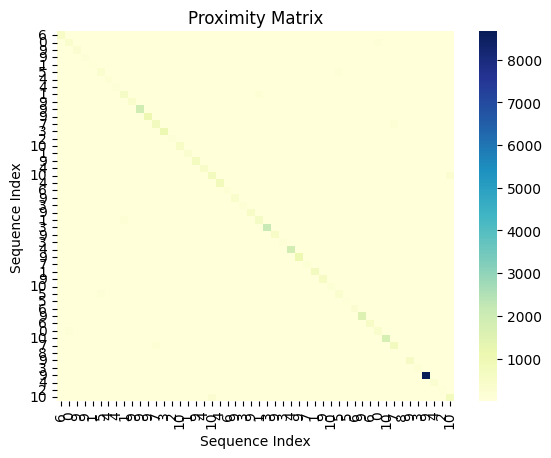

In [34]:
# Assuming you have true labels for evaluation (replace true_labels with your actual labels)
top50_id = list(df_seq['Protein id'])  # Replace with actual labels

# Assuming top50_seq is a list of protein sequences
num_sequences = len(top50_seq)


# Perform clustering using Affinity Propagation
affinity_labels = perform_affinity_propagation(similarity_matrix)

# Calculate NMI for Affinity Propagation
nmi_affinity = calculate_nmi(top50_id, affinity_labels)
print(f"Normalized Mutual Information (NMI) for Affinity Propagation: {nmi_affinity}")

# Visualize the proximity matrix for Affinity Propagation
visualize_proximity_matrix(similarity_matrix, affinity_labels)



In [13]:
# Save the plot
#plt.savefig("affinity_propagation_result.png")

/home/lilly/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Normalized Mutual Information (NMI) for K-means: 0.028288249812789167


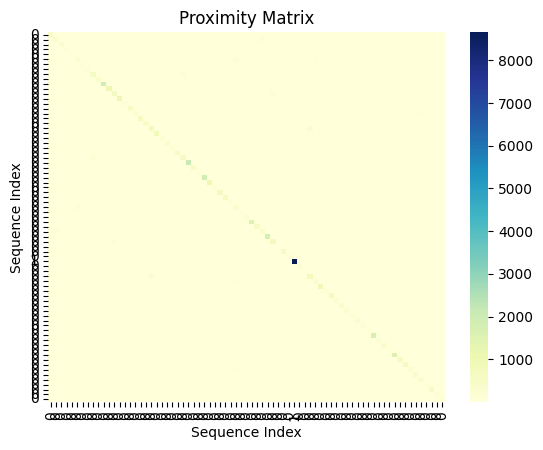

In [14]:
# Perform clustering using K-means
num_clusters = 2  # You can adjust the number of clusters as needed
kmeans_labels = perform_kmeans(similarity_matrix, num_clusters)

# Calculate NMI for K-means
nmi_kmeans = calculate_nmi(top50_id, kmeans_labels)
print(f"Normalized Mutual Information (NMI) for K-means: {nmi_kmeans}")

# Visualize the proximity matrix for K-means
visualize_proximity_matrix(similarity_matrix, kmeans_labels)

In [15]:
# Save the plot
plt.savefig("kmeans_result.png")

<Figure size 640x480 with 0 Axes>